In [20]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [98]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [96]:
data_path = ["../data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv("face_augmentated_9.csv")
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)

data.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,161 161 163 167 170 170 169 169 167 163 155 14...,False
2,0,31 38 43 40 33 40 42 37 34 40 47 49 52 68 82 7...,False
3,0,47 44 48 49 44 44 51 55 60 64 76 95 98 100 137...,False
4,0,20 30 20 13 32 38 41 44 47 46 43 40 41 61 87 9...,False


In [84]:
data.shape

(282598, 3)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282598 entries, 0 to 282609
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   emotion   282598 non-null  int64 
 1   pixels    282598 non-null  object
 2   Original  282598 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 6.7+ MB


In [86]:
data.describe()

,emotion
count,282598.000000
mean,2.495014
std,1.632402
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [99]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  282598
number of unique samples:  281429
keys:  ['emotion', 'pixels', 'Original']


Angry  39878
Fear  40955
Happy  72139
Sad  48289
Surprise  31699
Neutral  49638


ValueError: 'label' must be of length 'x'

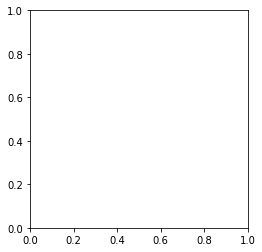

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')


plt.show()

In [88]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust.shape

(241643, 3)

In [103]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [104]:
X,y = data_X_y(data)

print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)

1.0
(282598, 48, 48, 1)
0.0 1.0
(282598,)


In [101]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X):
    # Array with all the unique emotions
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(6, len(labels))
    fig.set_size_inches(15,10)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        i = 0 # starting point
        for a in ax:
            # A list with a the index for the corresponding emotion
            data_label_index_list = data.index[data['emotion'] == label].tolist()

            a.imshow(X[data_label_index_list[i]])
            a.axis('off')
            a.set_title(CLASS_NAMES[label])
            i=i+1


TypeError: Invalid shape (2304,) for image data

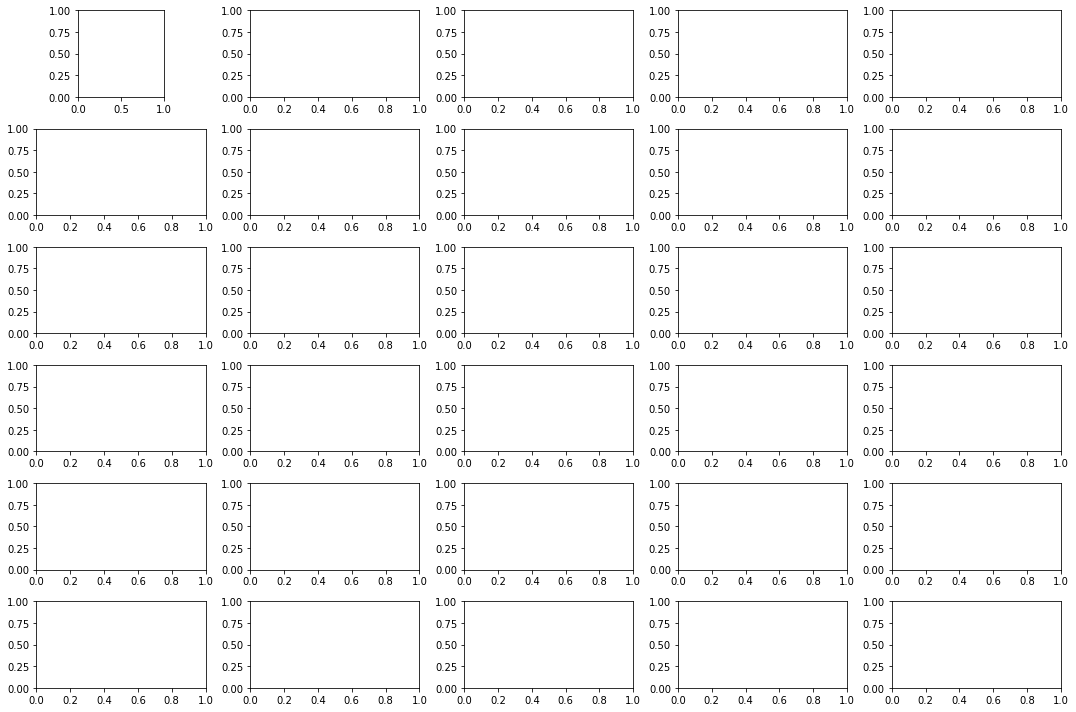

In [102]:
show_samples(X)

In [33]:
from skimage.feature import hog
from skimage.io import imread

def show_hog_samples(X):
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(1, len(labels))
    fig.set_size_inches(15,4)
    fig.tight_layout()

    for ax, label in zip(axes, labels):

        data_label_index_list = data.index[data['emotion'] == label].tolist()
        
        # The values below can be changes to decrease of increase the amount of details
        emotion_hog, emotion_hog_img = hog(
        X[data_label_index_list[0]],
        pixels_per_cell=(2,2),
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')
        
        ax.imshow(emotion_hog_img)
        ax.axis('off')
        ax.set_title(CLASS_NAMES[label])

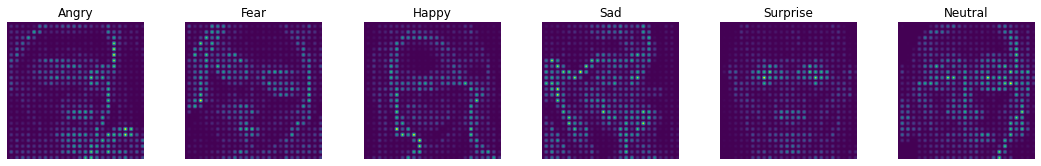

In [34]:
show_hog_samples(X)

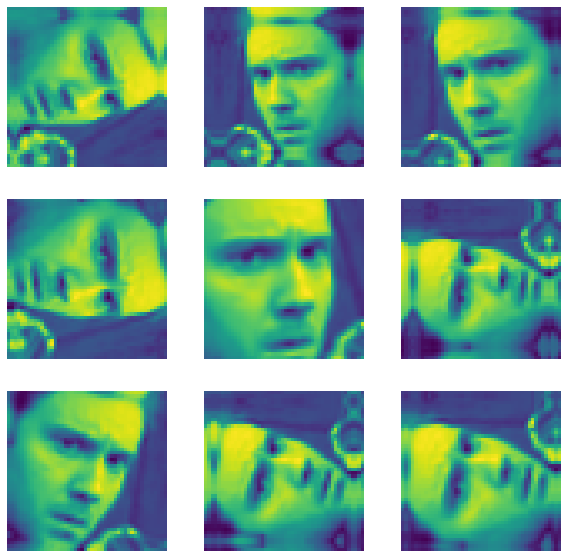

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [36]:
def join_list(list_pixels):
    # Creates a string from the list of pixels
    final_str = ' '.join(str(int(v)) for v in list_pixels)
    return final_str

def create_csv_data_augmentation(X, y, copies):
    # Creates new dataframe
    column_names = ["emotion", "pixels", "Original"]
    data_augmentated = pd.DataFrame(columns = column_names)
    
    for image,emotion in zip(X,y):
        # Adds the original image to the dataframe converted to a string
        image_array = list((np.array(image)).flat)
        image_string = join_list(image_array)
        new_row = {'emotion':emotion, 'pixels':image_string, 'Original':True}
        data_augmentated = data_augmentated.append(new_row,ignore_index=True)
        image_expand = tf.expand_dims(image, 0)

        for i in range(copies):
            # Adds the augmented image to the dataframe converted to a string
            augmented_image = data_augmentation(image_expand)
            augmented_image = list((np.array(augmented_image[0])).flat)
            augmented_image_string = join_list(augmented_image)
            new_row = {'emotion':emotion, 'pixels':augmented_image_string, 'Original':False}
            data_augmentated = data_augmentated.append(new_row, ignore_index=True)
    
    # Saves the dataframe to a csv file and in the title the amount of corresponding data augmentations
    save_data_augmentated_filepath = ('data/face_augmentated_{}'.format(copies))
    data_augmentated.to_csv(save_data_augmentated_filepath + '.csv', index = False)
    
    return data_augmentated

In [37]:
# # You can adjust the last value to choose how many unique copies you want to make
# # The higher the copies the longer the run time
data_aug = create_csv_data_augmentation((X*255.0), y, 1) 
print("Done")

KeyboardInterrupt: 

In [44]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_1.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug = pd.read_csv(file_path_aug)

In [45]:
data_aug.shape

(56522, 3)

In [46]:
data_aug.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,91 92 124 143 154 158 162 165 165 164 163 161 ...,False
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,True
3,0,134 137 137 104 100 130 120 132 123 89 99 125 ...,False
4,2,231 212 156 164 174 138 161 173 182 200 106 38...,True


In [47]:
data_aug.drop('Original', axis=1, inplace=True)
X_aug, y_aug = data_X_y(data_aug)
y_aug = y_aug.astype('int32')

print(X_aug.shape)
print(y_aug.shape)

(56522, 48, 48, 1)
(56522,)


NameError: name 'X_aug' is not defined

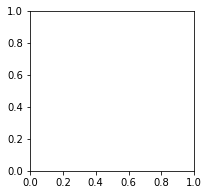

In [37]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug[i])
    plt.axis("off")

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [50]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import skimage

def hogify_X(X):
    hogify = HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2,2), 
        orientations=9, 
        block_norm='L2-Hys'
    )

    X_hog = hogify.fit_transform(X)

    return X_hog

In [51]:
X_hog = hogify_X(X) # This can be used for fitting a model faster with less data but still good in quality, test it with the other data samples
print(X_hog.shape)

(28261, 144)


In [105]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [106]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(282598, 48, 48, 1)
(282598, 2304)


In [82]:
print(X_aug.shape)
X_aug = reshape_X(X_aug)
print(X_aug.shape)

NameError: name 'X_aug' is not defined

In [107]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

#X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
#X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

#print(y_rus.value_counts())
print(y_ros.value_counts())
#print(y_smote.value_counts())

0    72139
1    72139
2    72139
3    72139
4    72139
5    72139
Name: emotion, dtype: int64


In [50]:
# Checks the unique rows in the array for smote, ros & rus
print(len(X_smote))
print(len(np.unique(X_smote, axis=0)))
print(len(X_ros))
print(len(np.unique(X_ros, axis=0)))
print(len(X_rus))
print(len(np.unique(X_rus, axis=0)))

43284
41663
43284
27092
19020
18177


In [17]:
X_aug_smote, y_aug_smote = smote.fit_resample(X_aug,y_aug) # This data is oversampled with smote
X_aug_ros, y_aug_ros = ros.fit_resample(X_aug,y_aug) # This data is oversampled
X_aug_rus, y_aug_rus = rus.fit_resample(X_aug,y_aug) # This data is undersampled

print(y_aug_rus.value_counts())
print(y_aug_ros.value_counts())
print(y_aug_smote.value_counts())

NameError: name 'X_aug' is not defined

In [108]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

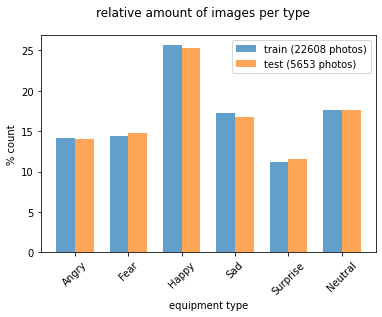

In [52]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

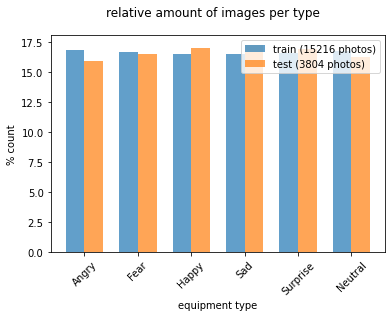

In [53]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_rus, 
    y_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_rus, loc='left')
plot_train_test_distribution(y_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_rus)), 
    'test ({0} photos)'.format(len(y_test_rus))
]);

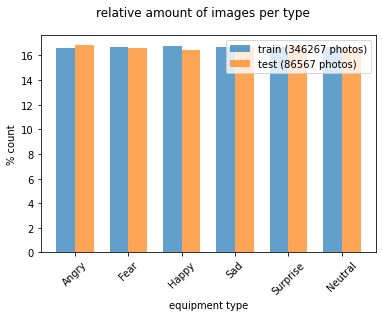

In [109]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, 
    y_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_ros, loc='left')
plot_train_test_distribution(y_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_ros)), 
    'test ({0} photos)'.format(len(y_test_ros))
]);

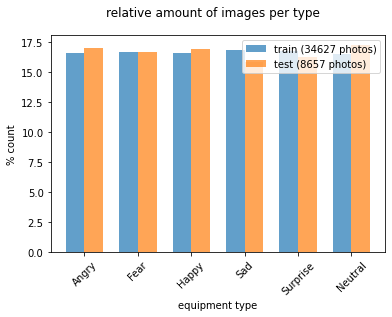

In [55]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_smote, loc='left')
plot_train_test_distribution(y_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_smote)), 
    'test ({0} photos)'.format(len(y_test_smote))
]);

In [110]:
# These are the X & y that can be used for fitting a ML model
#X_train, X_test, y_train, y_test
#X_train_rus, X_test_rus, y_train_rus, y_test_rus
X_train_ros, X_test_ros, y_train_ros, y_test_ros
#X_train_smote, X_test_smote, y_train_smote, y_test_smote
#X_hog, y # This does still have to be ros, rus or smote for balance and then split in to train & test

(array([[0.18431373, 0.16470588, 0.16862745, ..., 0.40392157, 0.39215686,
         0.37647059],
        [0.68627451, 0.69411765, 0.69803922, ..., 0.25098039, 0.36078431,
         0.49019608],
        [0.        , 0.        , 0.        , ..., 0.56470588, 0.49019608,
         0.41960784],
        ...,
        [0.03921569, 0.01176471, 0.03921569, ..., 0.33333333, 0.11372549,
         0.33333333],
        [0.58431373, 0.00784314, 0.54509804, ..., 0.56470588, 0.00784314,
         0.61960784],
        [0.14509804, 0.15294118, 0.15294118, ..., 0.19215686, 0.16470588,
         0.20392157]]),
 array([[0.6       , 0.36862745, 0.58039216, ..., 0.59607843, 0.38431373,
         0.61176471],
        [0.62352941, 0.63137255, 0.62352941, ..., 0.78431373, 0.79215686,
         0.8       ],
        [0.65098039, 0.42745098, 0.65882353, ..., 0.55686275, 0.34901961,
         0.56862745],
        ...,
        [0.1372549 , 0.17254902, 0.17254902, ..., 0.94509804, 0.94509804,
         0.94509804],
        [0.4

In [70]:
# This is the augmented dataset
# Has to be train & test split before use
X_aug_smote, y_aug_smote
X_aug_ros, y_aug_ros
X_aug_rus, y_aug_rus

In [59]:
# pip install python-resize-image
from resizeimage import resizeimage
from PIL import Image, ImageOps

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image


In [57]:
import joblib
loaded_ml = joblib.load("RandomForest-Augmented9-Oversampled-Accuracy80.81.joblib")

(48, 48, 1)
[1]


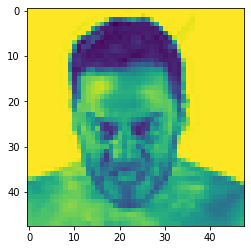

In [60]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
test_image = import_test_sample("data/Images_for_testing/17377054-close-up-image-of-man-gesturing-an-angry-face-against-white-background.jpg")
y_pred = loaded_ml.predict(np.reshape(test_image, (1, 2304)))
print(y_pred)

# Kan aan het verschil in versies liggen dat het niet voor mij werkt.

(48, 48, 1)
[2]


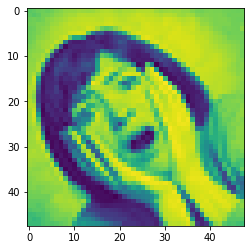

In [61]:
test_image = import_test_sample("data/Images_for_testing/66716562-woman-close-up-face-with-fear-afraid-emotion-close-up.jpg")
y_pred = loaded_ml.predict(np.reshape(test_image, (1, 2304)))
print(y_pred)

(48, 48, 1)
[2]


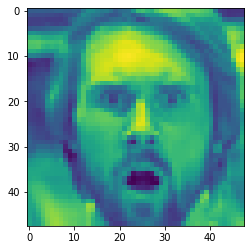

In [62]:
test_image = import_test_sample("data/Images_for_testing/depositphotos_181731764-stock-video-face-close-up-of-shocked.jpg")
y_pred = loaded_ml.predict(np.reshape(test_image, (1, 2304)))
print(y_pred)

(48, 48, 1)
[4]


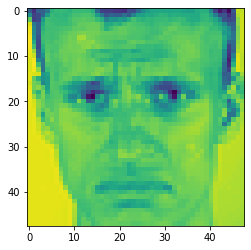

In [63]:
test_image = import_test_sample("data/Images_for_testing/84502259-sad-face-of-young-guy-close-up-of-man-crying-with-tears.jpg")
y_pred = loaded_ml.predict(np.reshape(test_image, (1, 2304)))
print(y_pred)

In [64]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='micro'),
                      'recall': recall_score(y_true, y_pred, average='micro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Normal dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train, y_train)

y_train_pred = modelDTC.predict(X_train)
y_test_pred = modelDTC.predict(X_test)

accuracy_train = measure_error(y_train, y_train_pred, 'train')
accuracy_test = measure_error(y_test, y_test_pred, 'test')

print(pd.concat([accuracy_train, accuracy_test], axis=1))

              train      test
accuracy   0.998894  0.314523
precision  0.998894  0.314523
recall     0.998894  0.314523
f1         0.998894  0.314523


In [37]:
#Undersampled dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train_rus, y_train_rus)

y_train_pred = modelDTC.predict(X_train_rus)
y_test_pred = modelDTC.predict(X_test_rus)

accuracy_rus_train = measure_error(y_train_rus, y_train_pred, 'train')
accuracy_rus_test = measure_error(y_test_rus, y_test_pred, 'test')

print(pd.concat([accuracy_rus_train, accuracy_rus_test], axis=1))

              train     test
accuracy   0.998883  0.29469
precision  0.998883  0.29469
recall     0.998883  0.29469
f1         0.998883  0.29469


In [38]:
#Oversampled dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train_ros, y_train_ros)

y_train_pred = modelDTC.predict(X_train_ros)
y_test_pred = modelDTC.predict(X_test_ros)

accuracy_ros_train = measure_error(y_train_ros, y_train_pred, 'train')
accuracy_ros_test = measure_error(y_test_ros, y_test_pred, 'test')

print(pd.concat([accuracy_ros_train, accuracy_ros_test], axis=1))

              train      test
accuracy   0.998845  0.664433
precision  0.998845  0.664433
recall     0.998845  0.664433
f1         0.998845  0.664433


In [39]:
#Smote dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train_smote, y_train_smote)

y_train_pred = modelDTC.predict(X_train_smote)
y_test_pred = modelDTC.predict(X_test_smote)

accuracy_smote_train = measure_error(y_train_smote, y_train_pred, 'train')
accuracy_smote_test = measure_error(y_test_smote, y_test_pred, 'test')

print(pd.concat([accuracy_smote_train, accuracy_smote_test], axis=1))

              train      test
accuracy   0.998903  0.451889
precision  0.998903  0.451889
recall     0.998903  0.451889
f1         0.998903  0.451889


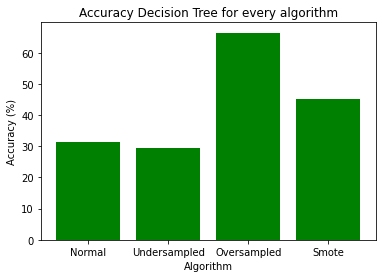

In [50]:
x = ['Normal', 'Undersampled', 'Oversampled', 'Smote']
y = [accuracy_test['accuracy'], accuracy_rus_test['accuracy'], accuracy_ros_test['accuracy'], accuracy_smote_test['accuracy']]

y = [y*100 for y in y]

plt.bar(x, y, color='green')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Decision Tree for every algorithm")

plt.xticks(x, x)

plt.show()

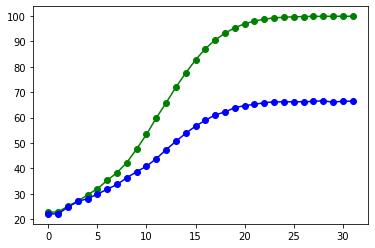

In [29]:
trainAccuracy = []
testAccuracy = []

for i in range(1,33):
    modelDTC = DecisionTreeClassifier(random_state=42, max_depth=i).fit(X_train_ros, y_train_ros)
    
    y_train_pred = modelDTC.predict(X_train_ros)
    y_test_pred = modelDTC.predict(X_test_ros)

    trainAccuracy.append(measure_error(y_train_ros, y_train_pred, 'train')['accuracy']*100)
    testAccuracy.append(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100)

plt.plot(trainAccuracy, color='green', marker='o')
plt.plot(testAccuracy, color='blue', marker='o')

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
modelRFC = RandomForestClassifier(random_state=42, max_depth=23).fit(X_train_ros, y_train_ros)

y_train_pred = modelRFC.predict(X_train_ros)
y_test_pred = modelRFC.predict(X_test_ros)

accuracy_rfc_train = measure_error(y_train_ros, y_train_pred, 'train')
accuracy_rfc_test = measure_error(y_test_ros, y_test_pred, 'test')

print(pd.concat([accuracy_rfc_train, accuracy_rfc_test], axis=1))

              train      test
accuracy   0.998787  0.741481
precision  0.998787  0.741481
recall     0.998787  0.741481
f1         0.998787  0.741481


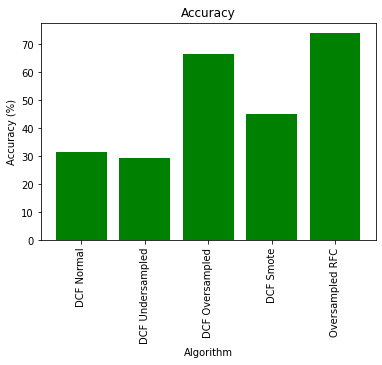

In [49]:
x = ['DCF Normal', 'DCF Undersampled', 'DCF Oversampled', 'DCF Smote', 'Oversampled RFC']
y = [accuracy_test['accuracy'], accuracy_rus_test['accuracy'], accuracy_ros_test['accuracy'], accuracy_smote_test['accuracy'], accuracy_rfc_test['accuracy']]

y = [y*100 for y in y]

plt.bar(x, y, color='green')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy")
plt.xticks(x, x, rotation=90)

plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(modelRFC, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [70]:
y_train_pred = bestF.predict(X_train_ros)
y_test_pred = bestF.predict(X_test_ros)

accuracy_rfc_train = measure_error(y_train_ros, y_train_pred, 'train')
accuracy_rfc_test = measure_error(y_test_ros, y_test_pred, 'test')

print(pd.concat([accuracy_rfc_train, accuracy_rfc_test], axis=1))

              train      test
accuracy   0.998787  0.759501
precision  0.998787  0.759501
recall     0.998787  0.759501
f1         0.998787  0.759501


In [82]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}


In [31]:
#Export Oversampled
import joblib
modelRFC = RandomForestClassifier(random_state=42, max_depth=23).fit(X_train_ros, y_train_ros)
y_test_pred = modelRFC.predict(X_test_ros)
accuracy_rfc_test = round(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'RandomForest-Oversampled-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['RandomForest-Oversampled-Accuracy73.99.joblib']

In [35]:
#Export Smote
modelRFC = RandomForestClassifier(random_state=42, max_depth=23).fit(X_train_smote, y_train_smote)
y_test_pred = modelRFC.predict(X_test_smote)
accuracy_rfc_test = round(measure_error(y_test_smote, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'RandomForest-Smote-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['RandomForest-Smote-Accuracy67.54.joblib']

In [36]:
#Decision Tree
import joblib
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=23).fit(X_train_ros, y_train_ros)
y_test_pred = modelDTC.predict(X_test_ros)
accuracy_rfc_test = round(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'DecisionTree-Oversampled-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['DecisionTree-Oversampled-Accuracy65.48.joblib']

In [37]:
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=23).fit(X_train_smote, y_train_smote)
y_test_pred = modelDTC.predict(X_test_smote)
accuracy_rfc_test = round(measure_error(y_test_smote, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'DecisionTree-Smote-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['DecisionTree-Smote-Accuracy44.85.joblib']

In [67]:
#Augemented 9 images

In [ ]:
#Export Oversampled
modelRFC = RandomForestClassifier(random_state=42, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=1200).fit(X_train_ros, y_train_ros)
y_test_pred = modelRFC.predict(X_test_ros)
accuracy_rfc_test = round(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'RandomForest-Augmented9-Oversampled-Accuracy' + str(accuracy_rfc_test) + '.joblib') 